 ## ATSC 507 Homework 1   -   Hybrid-Eta Exercise
 ### Chris Rodell
 Throught out the hw set we will be making using of the hypsometric equation as define by:
 $$
 z_{2}-z_{1} \approx a \overline{T_{v}} \cdot \ln \left(\frac{P_{1}}{P_{2}}\right)
 $$
 &
 $$
 P_{2}=P_{1} \cdot \exp \left(\frac{z_{1}-z_{2}}{a \cdot \overline{T_{v}}}\right)
 $$
 *Note we are not using virtual potential temperature*

In [13]:
import context
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from labellines import labelLine, labelLines
from cr507.utils import plt_set
from mpl_toolkits.axes_grid1 import make_axes_locatable

# %matplotlib
#

In [14]:

## Constants
a = 0.0293 ## 0.0293 km/K


## Set delta x and z
dx, dz = (20., 0.1)

## Set range in x and z
x = np.arange(0, 1000, dx)
z = np.arange(0, 30, dz)

## create 2D array (domain) of x and z
xx, zz = np.meshgrid(x, z)

## create mnt range on surface of domain
z_si = 1 + np.cos(2.*(3.14159)*(x-500.) / 500.)
## apply condtion for mnt location
z_ground = np.where((250 < x) & (x < 750), z_si, 0 )


 ### Set up your domain

In [15]:

## Solve for temperature across domain 
# def temp
T_trop = (40 - 0.08 * xx) - 6.5*zz  ## Within hypotehtical troposphere
T_iso = (40 - 0.08 * xx) - 6.5*12   ## Above hypotehtical troposphere (isothermal)

## Apply condition to set temps above "tropopause" to be isothermal
T = np.where(zz < 12, T_trop, T_iso)
## Convert to Kelvin for later calcualtions
T = T + 273.15
T = np.vstack((T, T[-1,:]))




 ### Solve for pressure across the surface (x) of the domain (ie z = 0)

In [16]:
## Solve for pressure across the surface (x) of the domain (ie z = 0)
P_1 = 95 + 0.01 * x

def pressure(P_1,T):
    """
    The hypsometric equation  
    """
    P_2 = P_1 * np.exp((-dz)/(a*T))
    return P_2

P_list, T_avg = [], []
for i in range(len(z)):
    P_list.append(P_1)
    T_avg_i = (T[i,:]+T[i+1,:])/2.
    T_avg.append(T_avg_i)
    P_2 = pressure(P_1,T_avg_i)
    P_1 = P_2




T_avg = np.stack(T_avg)
P_msl = np.stack(P_list)


 ### Question 1
 Find:  On an x-z graph, plot the altitudes (km) of the following isobaric surfaces:
 100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 5, 2 kPa.
 On the same plot, plot the altitude of Zground.

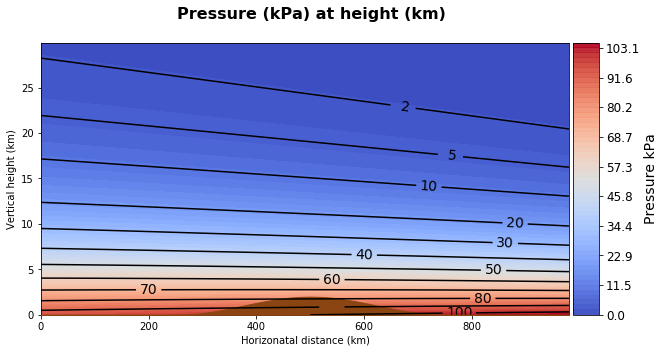

In [17]:

## Set up Figure for plotting multiple variable on one graph
fig, ax = plt.subplots(1,1, figsize=(10,5))
fig.suptitle('Pressure (kPa) at height (km)', fontsize= plt_set.title_size, fontweight="bold")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

def confil(var):
    """ 
    This funstion set up the extent for you color bar
    """
    v = np.linspace(0,105,56)
    Cnorm = colors.Normalize(vmin= np.min(var), vmax =np.max(var))
    return v, Cnorm

## Plot mnt
ax.fill_between(x,0, z_ground, color = 'saddlebrown', zorder = 4)
ax.set(xlabel='Horizonatal distance (km)',ylabel='Vertical height (km)')
## Plot isobars
v_line = [2,5,10,20,30,40,50,60,70,80,90,100]
CS = ax.contour(xx, zz, P_msl, levels = v_line, colors = 'black', zorder = 10)
ax.clabel(CS, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels

## contour pressure feild
v, Cnorm = confil(P_msl)
C = ax.contourf(xx, zz, P_msl, cmap = 'coolwarm', norm = Cnorm, levels = v, zorder = 1)
clb = plt.colorbar(C,cax=cax, extend='both')
clb.set_label('Pressure kPa', fontsize = plt_set.label)
clb.ax.tick_params(labelsize= plt_set.tick_size) 
clb.set_alpha(.95)
clb.draw_all()

   



 ### Question 2)
 2) Interpolate to find the Psurface (kPa) pressure at Zground.
 Namely, it is the pressure that corresponds to eta = 1.
 This pressure that you use to find eta in exercises (3) & (4).
 Present the results in a table, where:
 row1 = x, (km)
 row2 = Zground, (km)
 row3=Psfc (kPa)

In [18]:

## Solve for pressure 
P_surf = P_msl[0,:] * np.exp((zz[0,:]-z_ground)/(a*T_avg[0,:]))

## Set up table (sorry they are in columns not rows)
values = {'x(km)': x, 'Zground(km)': z_ground, 'Psfc(kPa)':P_surf}

df = pd.DataFrame(values, columns = ['x(km)', 'Zground(km)', 'Psfc(kPa)'])

save = str(context.data_dir)  + '/Q2_Table.csv'

## Save table as csv file
df.to_csv(save)

## Display table in notebook
df


,x(km),Zground(km),Psfc(kPa)
0,0.0,0.000000,95.000000
1,20.0,0.000000,95.200000
2,40.0,0.000000,95.400000
3,60.0,0.000000,95.600000
4,80.0,0.000000,95.800000
5,100.0,0.000000,96.000000
6,120.0,0.000000,96.200000
7,140.0,0.000000,96.400000
8,160.0,0.000000,96.600000
9,180.0,0.000000,96.800000


 ### Question 3)
 Create a new P-x graph, on which you plot lines of constant eta,
 for the eta values listed below.  Namely, it should look something
 like WRF4 figure 2.1b, but with the more realistic meteorology that
 I prescribed above.  Also, like that figure, plot pressure P on the
 vertical axis in reversed order (highest pressure at the bottom of
 the figure), but don't use a log scale for P.
 <br />
 <br />
 CAUTION: when calculating the values of B to use in WRF4 eq. (2.2),
 be advised that WRF4 eq. (2.3) applies only for eta > eta_c. Otherwise, set B = 0 for eta <= eta_c.
 <br />
 <br>
 eta = 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1
 <br />
 <br />
 <br />
 - (2.2)
 $$
 p_{d}=B(\eta)\left(p_{s}-p_{t}\right)+[\eta-B(\eta)]\left(p_{0}-p_{t}\right)+p_{t} (2.2)
 $$

 - (2.3)
 $$
 B(\eta)=c_{1}+c_{2} \eta+c_{3} \eta^{2}+c_{4} \eta^{3}
 $$

 - (2.5)
 $$
 c_{1}=\frac{2 \eta_{c}^{2}}{\left(1-\eta_{c}\right)^{3}}, \quad c_{2}=\frac{-\eta_{c}\left(4+\eta_{c}+\eta_{c}^{2}\right)}{\left(1-\eta_{c}\right)^{3}}, \quad c_{3}=\frac{2\left(1+\eta_{c}+\eta_{c}^{2}\right)}{\left(1-\eta_{c}\right)^{3}}, \quad c_{4}=\frac{-\left(1+\eta_{c}\right)}{\left(1-\eta_{c}\right)^{3}}
 $$

In [19]:
## Solve for pressure based on eq in WRF Tech Notes and information provided in hw

P_top = 2 ## kPa
P_0 = 100 ## kPa
eta_c = 0.3
eta = np.linspace(0, 1, num=len(z))
eta_ref = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95,1])
# eta = eta[::-1]
# eta = np.round(eta,3)
eta = eta_ref[::-1]

c1 = (2*eta_c**2)/((1 - eta_c)**3)

c2 = -eta_c*(4 + eta_c + eta_c**2)/(1- eta_c)**3

c3 = 2*(1+ eta_c + eta_c**2)/(1- eta_c)**3

c4 = -(1 + eta_c)/(1- eta_c)**3

B_eta = c1 + c2*eta + c3*eta**2 +c4*eta**3

## apply condition to B_eta as
B_eta_final = np.where(eta>eta_c,B_eta,0)

P_d_final = []
for i in range(len(B_eta_final)):
    P_d = B_eta_final[i]*(P_surf-P_top) + (eta[i]-B_eta_final[i])*(P_0 - P_top) + P_top
    P_d_final.append(P_d)

## Stack list or array to 2D array
P_d_final = np.stack(P_d_final)



(109.94000000000001, -3.1400000000000006)

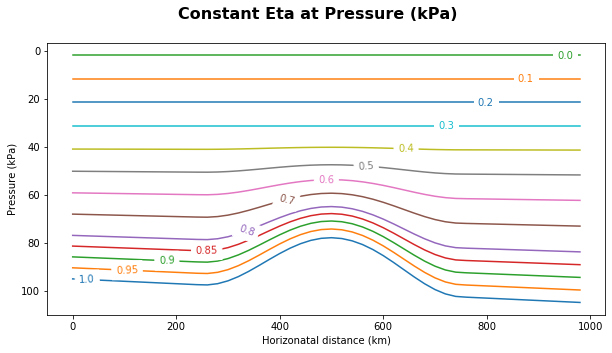

In [20]:
## Set up Figure for plotting P-x graph with lines of constant eta
fig, ax = plt.subplots(1,1, figsize=(10,5))
fig.suptitle('Constant Eta at Pressure (kPa)', fontsize= plt_set.title_size, fontweight="bold")

for i in range(len(P_d_final[:,0])):
    ax.plot(x,P_d_final[i,:], zorder = 1,label=str(eta[i]))
    # ax.plot(x,P_d_final[i,:], zorder = 1)
labelLines(plt.gca().get_lines(),zorder=2.5)
ax.set(xlabel='Horizonatal distance (km)',ylabel='Pressure (kPa)')
ax.set_ylim(ax.get_ylim()[::-1])



 ### Question 4)
 Create a new z-x graph, on which you plot the z altitudes of the constant eta
 lines for the same eta values as in part (3) above. Make use of the hypsometric eq
 to find the heights z at the pressure levels that correspond to the requested eta values.

In [21]:

# Solve for height values of the associated pressure values calculated in question 3
z_1 = z_ground

P_d_final = np.vstack((P_d_final, P_d_final[-1,:]))

z_list =[]
# delta_z_list []
for i in range(len(eta)):
    z_list.append(z_1)
    T_trop = (40 - 0.08 * x) - 6.5*z_1
    T_trop = T_trop + 273.15
    delta_z = a * T_trop * np.log(P_d_final[i,:]/P_d_final[i+1,:])
    z_1 = z_1 + delta_z
    if z_1.all() > 12:
        T_iso = (40 - 0.08 * xx) - 6.5*12
        delta_z = a * T_iso * np.log(P_d_final[i,:]/P_d_final[i+1,:])
        z_1 = z_1 + delta_z
    else:
        pass

z_heights = np.stack(z_list)


[Text(0, 0.5, 'Vertical height (km)'),
 Text(0.5, 0, 'Horizonatal distance (km)')]

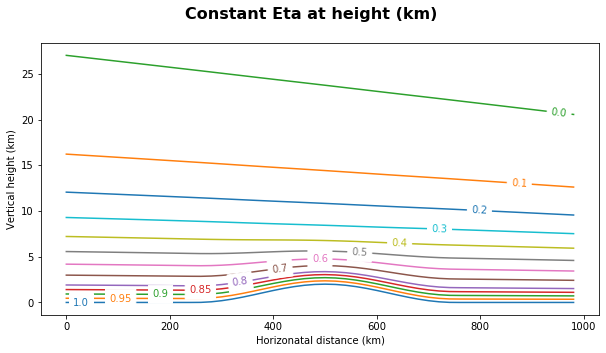

In [22]:

## Set up Figure for plotting P-x graph with lines of constant eta
fig, ax = plt.subplots(1,1, figsize=(10,5))
fig.suptitle('Constant Eta at height (km)', fontsize= plt_set.title_size, fontweight="bold")

# z_heights_short = z_heights[::2,:]
for i in range(len(z_heights[:,0])):
    ax.plot(x,z_heights[i,:],label=str(eta[i]))
labelLines(plt.gca().get_lines(),zorder=2.5)
ax.set(xlabel='Horizonatal distance (km)',ylabel='Pressure (kPa)')

# ax.fill_between(x,0, z_ground, color = 'saddlebrown', zorder = 4)
ax.set(xlabel='Horizonatal distance (km)',ylabel='Vertical height (km)')







